# MC866 Project 1

## PART I - Clustering Methods

## K-Means

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
import matplotlib
import math
import time

In [3]:
class KMeans:
    def __init__(self, X, n_clusters=5, random_state=None):
        self.n_clusters = n_clusters
        self.X = X
        self.rand = np.random.RandomState(random_state)
        self.centroids = []

    def init_centroids(self):
        self.centroids = self.rand.permutation(self.X)[:self.n_clusters]

    # returns an array of what cluster each point of the dataset belongs to
    def clusters(self, data=None):
        if data is None:
            data = self.X
         
        distances = np.array([])
        for c in self.centroids:
            def euclidian_distance(x): 
                sum = np.sum(np.apply_along_axis(lambda p: np.power(p[0] - p[1], 2), 1, np.column_stack((x, c)))) # sum of the square of the difference of each feature to the corresponding centroid feature
                return np.sqrt(sum) # sqrt the root to find the euclidian distance
            d = np.apply_along_axis(euclidian_distance, 1, data)
            distances = np.append(distances, d)
        distances = distances.reshape((self.n_clusters, len(data)))
        distances = distances.T # list of distances of each centroid to the element in the given index (equivalent to zip(*distances) but faster)
        return np.apply_along_axis(np.argmin, 1, distances) # the index of which centroid each data point belongs to

    # Move the centroids to their cluster centers until convergence
    def fit(self):
        start_time = time.time()
        iterations = 0
        while True:
            iterations += 1
            clusters = self.clusters()
            changed = False
            for i in range(0, len(self.centroids)):
                data_filter = clusters == i
                filtered_data = self.X[data_filter] # only data that belongs to the cluster
                avg = np.sum(filtered_data, axis=0)
                avg = np.apply_along_axis(lambda x: x/filtered_data.shape[0], 0, avg)
                
                for j in range (0, avg.shape[0]):
                    if self.centroids[i][j] != avg[j]:
                        changed = True
                        self.centroids[i][j] = avg[j]
            if not changed:
                break
        
        print(f"converged in {iterations} iterations")
        print("--- %s seconds ---" % (time.time() - start_time))




### The Dataset
Using the 2d dataset, we split 90% for training and 10% for test.

In [4]:
df = pd.read_csv("./data/cluster.dat", sep=' ', header=None)
df.head()

msk = np.random.rand(len(df)) < 0.9 # split dataset (90% train and 10% test)

df_train = df[msk]
df_test = df[~msk]

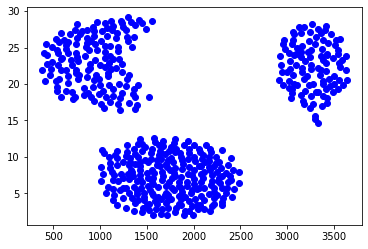

In [5]:
# 2D dataset

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="blue") # the data
plt.show()

By observing the visualization of the dataset, we can verify that 3 clusters would be adequate.

In [6]:
k = KMeans(X=df_train.to_numpy(), n_clusters=3)

The centroids are initialy positioned at random points of the dataset provided for training.

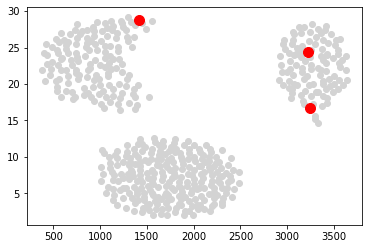

In [7]:
# initialize centroids and show their initial position in the chart
k.init_centroids()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

We use the clusters method to get to which centroid each data point is closest to

In [8]:
k.clusters()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Initially without any fitting, the clusters provided are the following

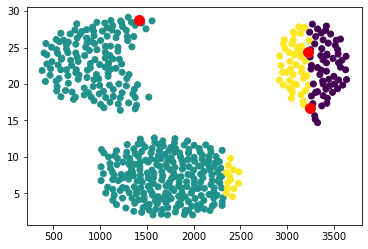

In [9]:
# Result of clusters before any fitting is done

c = k.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

In [10]:
k.fit()

converged in 11 iterations
--- 1.0568866729736328 seconds ---


### Results after fitting with the raw training data

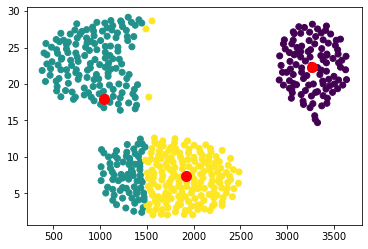

In [11]:
# Result of clusters after fitting is done

c = k.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1],k.centroids[:,1:], c="red", s=100) # the data
plt.show()

As we can observe we have a problem regarding the data normalization, sice the scale of the X axis on the chart is much larger than the Y axis. That inflates the euclidian distance in that direction, so we get results that would not be intuitively expected.

### Normalizing the data

## Checking the test data distribution

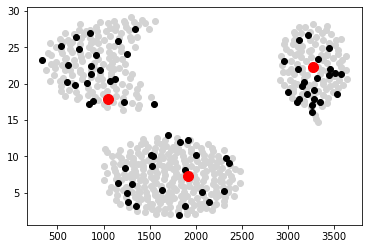

In [12]:
# the test data
fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(df_test.iloc[:,:1].values, df_test.iloc[:,1:].values, c="black") # the data
ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

## How the test data was classified using the prefitted kmeans model

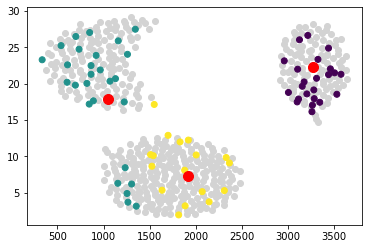

In [13]:
c = k.clusters(data=df_test.to_numpy())

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(df_test.iloc[:,:1].values, df_test.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

### Applying PCA

In [14]:
pca = decomposition.PCA(n_components=2)
pca.fit(df_train)
df_train_pca = pca.transform(df_train)

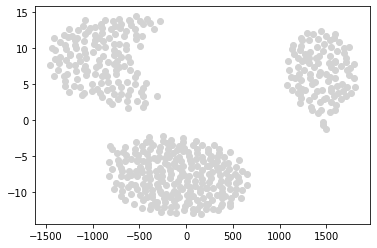

In [15]:
fig, ax = plt.subplots()
ax.scatter(df_train_pca[:,:1], df_train_pca[:,1:], c="lightgray") # the data
# ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

In [16]:
k_pca = KMeans(X=df_train_pca, n_clusters=3)
k_pca.init_centroids()

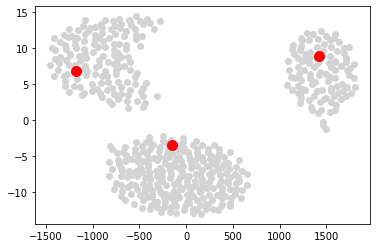

In [17]:
fig, ax = plt.subplots()
ax.scatter(df_train_pca[:,:1], df_train_pca[:,1:], c="lightgray") # the data
ax.scatter(k_pca.centroids[:,:1], k_pca.centroids[:,1:], c="red", s=100) # the data
plt.show()

In [18]:
k_pca.fit()

converged in 8 iterations
--- 0.7519950866699219 seconds ---


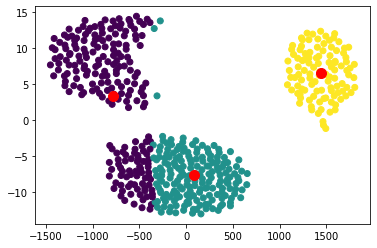

In [19]:
# Result of clusters after fitting is done

c = k_pca.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train_pca[:,:1], df_train_pca[:,1:], c=c) # the data
ax.scatter(k_pca.centroids[:,:1],k_pca.centroids[:,1:], c="red", s=100) # the data
plt.show()